# Download the loan dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devzohaib/eligibility-prediction-for-loan")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/eligibility-prediction-for-loan


Import LIbraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
in this section the data will be cleaned, encoded, and preprocessed

In [3]:
df = pd.read_csv("/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv")

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


it seems there are columns with missing values. Let's check how many missing values are there!

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
gender_impact = df.groupby("Gender")["Loan_Status"].value_counts(normalize=True).unstack()
print(gender_impact)

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


In [10]:
married_impact = df.groupby("Married")["Loan_Status"].value_counts(normalize=True).unstack()
print(married_impact)

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


In [11]:
edu_impact = df.groupby("Education")["Loan_Status"].value_counts(normalize=True).unstack()
print(edu_impact)

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


Since the approval rates for both genders are nearly the same, we won't need the Gender column

We also won't need loan_id column for the prediction, so it can be removed.

In [12]:
df.drop(columns=["Loan_ID", "Gender"], inplace=True)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now we need to encode columns with categorical data

In [13]:
binary_mappings = {
    "Married": {"Yes": 1, "No": 0},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
    "Loan_Status": {"Y": 1, "N": 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)
    
df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  611 non-null    float64
 1   Dependents               599 non-null    object 
 2   Education                614 non-null    int64  
 3   Self_Employed            582 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               592 non-null    float64
 7   Loan_Amount_Term         600 non-null    float64
 8   Credit_History           564 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
dtypes: bool(2), float64(6), int64(3), object(1)
memory usage: 49.3+ KB


For crucial columns, such as loan amount and credit history, the row with missing values must be taken with care. We can use median to fill the missing loan amount and use "most_frequent" to fill the missing values in categorical columns and "Dependents" column

In [15]:
from sklearn.impute import SimpleImputer

# Fill numerical missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_cols = ["LoanAmount", "Loan_Amount_Term"]
df[num_cols] = imputer.fit_transform(df[num_cols])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_cols = ["Dependents", "Self_Employed", "Married", "Credit_History"]
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# change types to int
df["Dependents"] = df["Dependents"].replace({"3+": 3}).astype(int)
df["Property_Area_Semiurban"] = df["Property_Area_Semiurban"].astype(int)
df["Credit_History"] = df["Credit_History"].astype(int)
df["Self_Employed"] = df["Self_Employed"].astype(int)
df["Married"] = df["Married"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    bool   
dtypes: bool(1), float64(3), int64(8)
memory usage: 53.5 KB


In [16]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,128.0,360.0,1,1,0,True
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0,False
2,1,0,1,1,3000,0.0,66.0,360.0,1,1,0,True
3,1,0,0,0,2583,2358.0,120.0,360.0,1,1,0,True
4,0,0,1,0,6000,0.0,141.0,360.0,1,1,0,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    bool   
dtypes: bool(1), float64(3), int64(8)
memory usage: 53.5 KB


Let's do some feature engineering by combining applicant income and co appilicant income into total income

In [18]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    int64  
 7   Loan_Status              614 non-null    int64  
 8   Property_Area_Semiurban  614 non-null    int64  
 9   Property_Area_Urban      614 non-null    bool   
 10  Total_Income             614 non-null    float64
dtypes: bool(1), float64(3), int64(7)
memory usage: 48.7 KB


In [19]:
df["Total_Income"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

Let's check the distribution of the labels

In [20]:
df["Loan_Status"].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

it seems like we need to do oversampling for the minority class to fix class imbalance. We will use random oversampling instead of SMOTE to prevent introducing synthetic bias to the model (especially for loan problems). Before oversampling the minority class, we need to split extract independent variables and dependent variable from the dataframe

In [21]:
features = ["Married", "Dependents", "Education", "Credit_History", "Property_Area_Semiurban","LoanAmount", "Loan_Amount_Term",
           "Total_Income", "Property_Area_Urban", "Self_Employed"]

X = df[features]
y = df["Loan_Status"]

In [22]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="auto")
X_resampled, y_resampled = oversample.fit_resample(X, y)

y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

Let's also use SMOTE for reference

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled2, y_resampled2 = smote.fit_resample(X, y)

y_resampled2.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

we need to split the data for training and test, using the good ol' 80/20 split

In [24]:
from sklearn.model_selection import train_test_split

# Random Oversample
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=0)

# SMOTE data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.15, random_state=0)

In [25]:
X_train

,Married,Dependents,Education,Credit_History,Property_Area_Semiurban,LoanAmount,Loan_Amount_Term,Total_Income,Property_Area_Urban,Self_Employed
311,0,0,0,1,1,111.0,360.0,5332.0,False,0
1,1,1,1,1,0,128.0,360.0,6091.0,False,0
823,0,0,1,0,0,187.0,360.0,10416.0,True,1
251,0,2,1,1,0,138.0,360.0,3427.0,True,0
504,1,0,0,1,1,124.0,300.0,5297.0,False,0
...,...,...,...,...,...,...,...,...,...,...
835,1,0,1,1,0,135.0,360.0,1950.0,False,0
192,1,0,0,1,0,160.0,360.0,6033.0,True,0
629,0,1,0,1,1,190.0,360.0,4311.0,False,1
559,1,0,1,1,1,182.0,360.0,6486.0,False,0


In [26]:
y_train

311    1
1      0
823    0
251    0
504    1
      ..
835    0
192    0
629    0
559    1
684    0
Name: Loan_Status, Length: 717, dtype: int64

Now let's scale the features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Random Oversample
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

#SMOTE
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=features)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=features)

# Predictive Modeling
Now for the model, we will use logistic regression first then we will use more advanced model like xgboost and random forest.

Let's make function for assessing model performance

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

def assess_model(y_test, y_train):
    cm = confusion_matrix(y_test, y_pred)

    # print accuracy
    print("Model accuracy score:", accuracy_score(y_test, y_pred))

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()     

## Logistic Regression Approach

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

Now let's try predicting the X_test and save it to a variable named y_pred

In [30]:
y_pred = classifier.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Now we assess the performance of this model by using confusion matrix and accuracy score

Model accuracy score: 0.6929133858267716


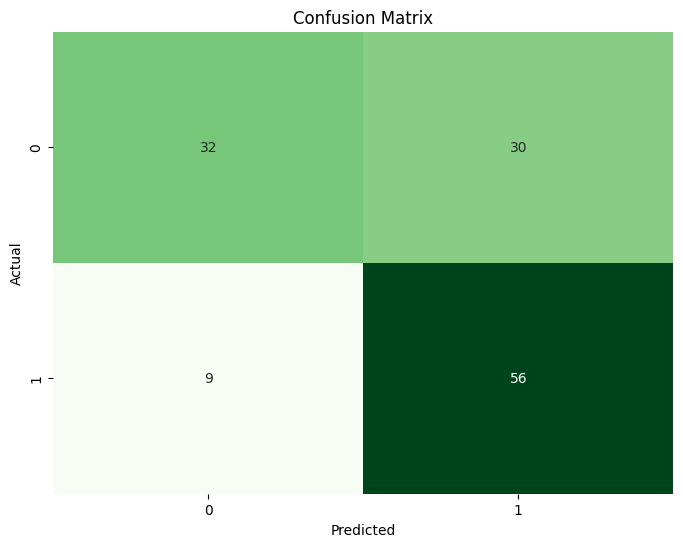

In [31]:
assess_model(y_test, y_train)

The accuracy is quite bad for our data to use logistic regression, let's try with another model, more advanced one

## Random Forest Approach

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, max_depth=None, criterion = 'gini', random_state = 0, class_weight='balanced')
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=0)

In [33]:
y_pred = classifier.predict(X_test_scaled)

Now let's assess its performance

Model accuracy score: 0.8661417322834646


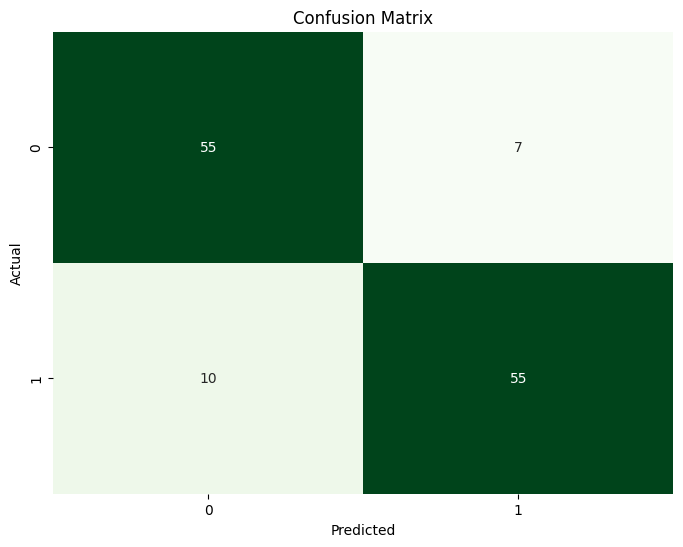

In [34]:
assess_model(y_test, y_train)

How about trying to use SMOTE instead of random oversampling

Model accuracy score: 0.8661417322834646


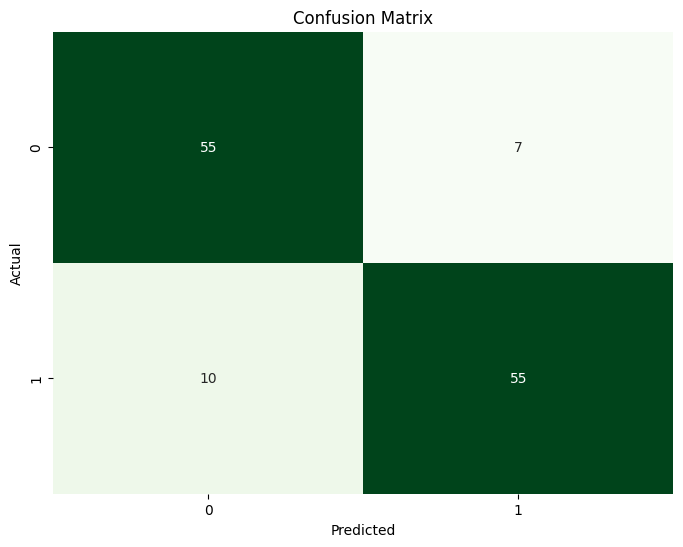

In [35]:
# retrain the model
classifier.fit(X_train_scaled2, y_train2)

# predict again
y_pred_new = classifier.predict(X_test_scaled2)

# assess model
assess_model(y_test2, y_pred_new)

OK, the accuracy is quite good, let's try to optimize the model using gridsearch

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'criterion': ['gini', 'entropy'],  
    'min_samples_split': [2, 5, 10]
}

# initiate classifier
rf = RandomForestClassifier(random_state=0)

# perform Grid Search
grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors
    verbose=1  # Show progress
)

# train GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


Model accuracy score: 0.8661417322834646


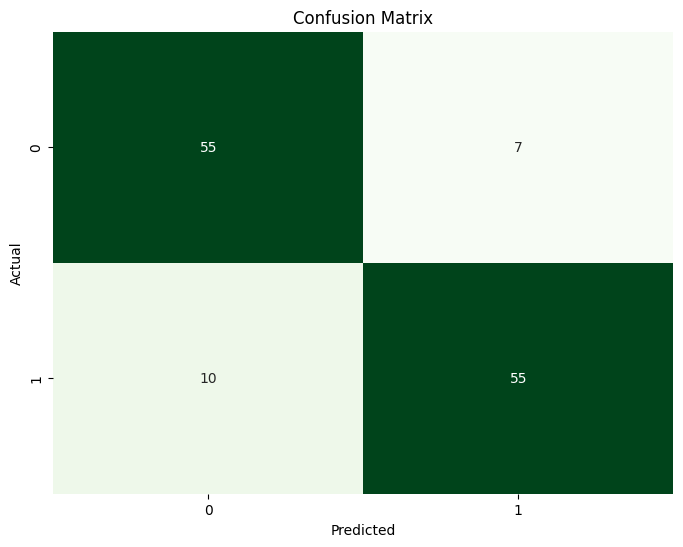

In [37]:
# reinitiate classifier
classifier = RandomForestClassifier(
    n_estimators = 300, 
    max_depth=20, 
    criterion = 'gini', 
    random_state = 0, 
    min_samples_split = 2
)

# retrain the model
classifier.fit(X_train_scaled, y_train)

# predict again
y_pred_new = classifier.predict(X_test_scaled)

# assess model
assess_model(y_test, y_pred_new)

## XGBoost Approach

In [38]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=300, max_depth=None, random_state=0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

Model accuracy score: 0.84251968503937


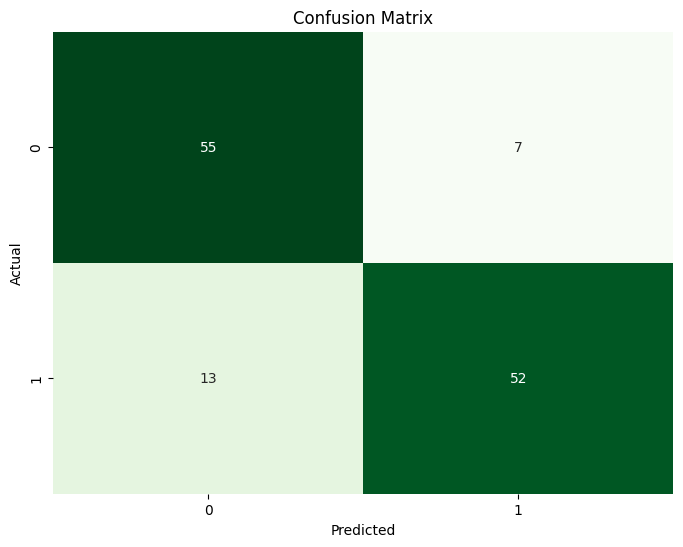

In [39]:
assess_model(y_test, y_pred)

Model accuracy score: 0.84251968503937


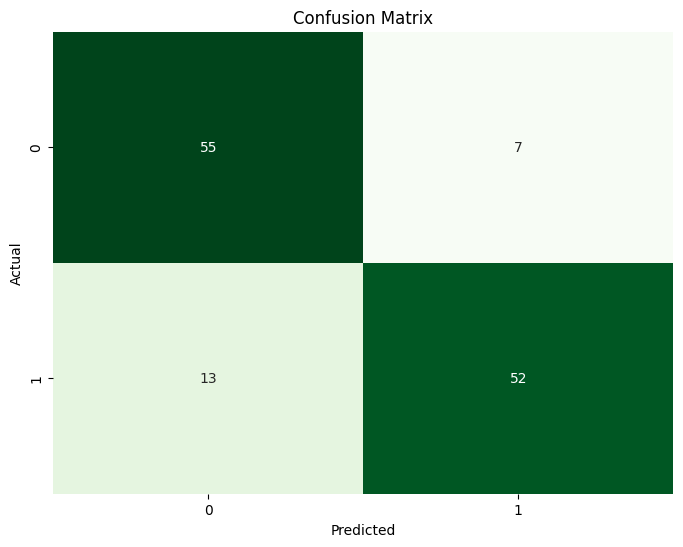

In [40]:
# retrain the model
classifier.fit(X_train_scaled2, y_train2)

# predict again
y_pred_new = classifier.predict(X_test_scaled2)

# assess model
assess_model(y_test2, y_pred_new)

Let's optimize using gridsearch

In [41]:
# define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],  # Fraction of data to use per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features per tree
}

# initialize XGBoost classifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# perform Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors
    verbose=1  # Show progress
)

# train GridSearchCV on training data
grid_search_xgb.fit(X_train, y_train)

# get the best parameters and best accuracy score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Cross-Validation Accuracy:", best_score_xgb)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8452214452214453


Model accuracy score: 0.84251968503937


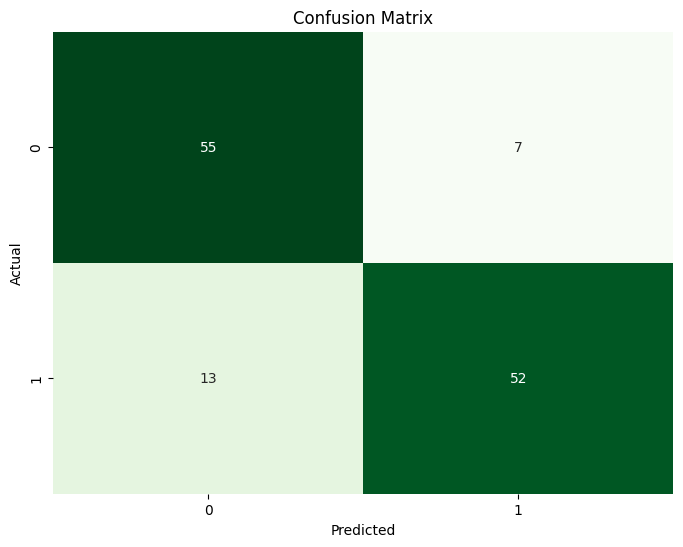

In [42]:
# reinitiate classifier
classifier = XGBClassifier(
    n_estimators = 200, 
    max_depth = 9, 
    learning_rate = 0.1,
    subsample = 1, 
    random_state = 0, 
    colsample_bytree = 0.8 
)

# retrain the model
classifier.fit(X_train_scaled, y_train)

# predict again
y_pred_new = classifier.predict(X_test_scaled)

# assess model
assess_model(y_test, y_pred_new)

This is just to show which features are important

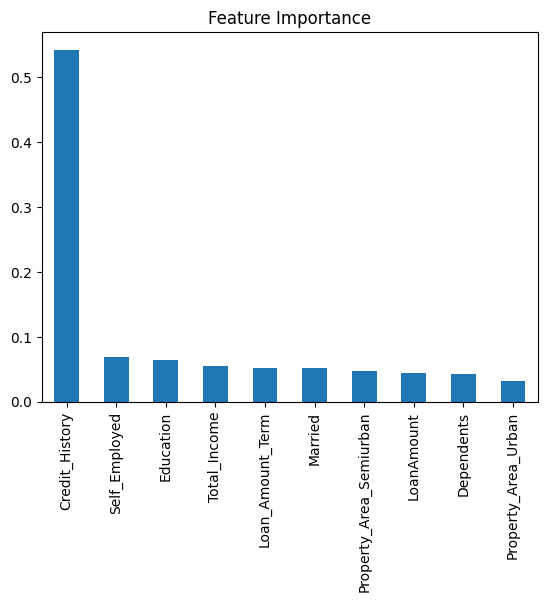

In [43]:
# Get feature importance
importance = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Plot feature importance
importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
plt.show()